In [5]:
# Load the needed python libraries by executing this python code (press ctrl enter)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy import stats

In [6]:
#Load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, delimiter=';')
df.head() # Print the first five rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


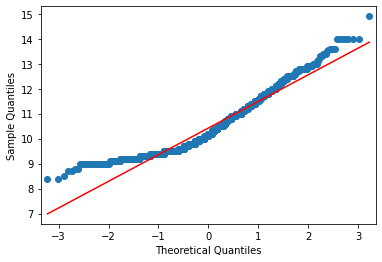

In [8]:
# Choose species & slength
#df_virginica = df[df['species']=='Iris-virginica']
alcohol = df['alcohol']
# Q-Q-Plot
fig=sm.qqplot(alcohol, line='s')
plt.show()

In [20]:
#Normality Test
#Null Hypothesis : Alcohol follow a Normal distribution
k2, p = stats.normaltest(alcohol) # D Agostino-Pearson. The method returns the test statistic value and the p-value
alpha = 0.001 # Rejection criterion defined by you
print('Alpha = ',alpha)
print('p = ',p)
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("The alcohol in wine is not normally distributed")
else:
  print("We cannot conclude that alcohol in wine is not normally distributed")

Alpha =  0.001
p =  3.3163288473185496e-34
The alcohol in wine is not normally distributed


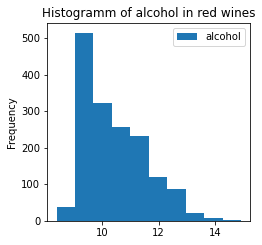

In [11]:
#Test if the distribution is symmetric 
#Draw histogramm

plt.figure(figsize=(8  ,8))
plt.subplot(2,2,1)
df['alcohol'].plot(kind="hist",fill=True,histtype='barstacked',title='Histogramm of alcohol in red wines', label="alcohol", color= 'tab:blue')
#ax_s = df['alcohol'].plot(kind="hist",fill=True,histtype='barstacked', label="alcohol",  color= 'tab:orange')
ax_s.set_xlabel('alcohol')
ax_s.set_ylabel('absolute frequency')
plt.legend()

In [13]:
We observe that the distribution is positively skewed.

SyntaxError: invalid syntax (1766808292.py, line 1)

In [19]:
#If the distribtuion is neither normal nor symmetric we can perform a sign-test.
#We assume that the degree of alcohol in red wine should be different than 16%, because porto is between 16-20%.
#And porto is not wine
import statsmodels.stats.descriptivestats as dstat
k2, p = dstat.sign_test(df, mu0=16)
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("Wine does not contain the same alcohol as Porto")
else:
  print("We cannot conclude that wine does not contain the same alcohol as Porto")

Wine does not contain the same alcohol as Porto
